In [1]:
from numpy import *
from matplotlib.pyplot import *
import networkx as nx
import imageio

In [2]:
def initialize():
    global g, nextg
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random.random() < .5 else 0
    nextg = g.copy()
    nextg.pos = g.pos
    
def observe():
    global g, nextg
    cla()
#    fig,ax=subplots()
    nx.draw(g,ax=ax, cmap = cm.Spectral, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

alpha = 1 # diffusion constant
Dt = 0.01 # Delta t

def update():
    global g, nextg
    for i in g.nodes:
        ci = g.nodes[i]['state']
        nextg.nodes[i]['state'] = ci + alpha * ( \
            sum([g.nodes[j]['state'] for j in g.neighbors(i)]) \
            - ci * g.degree(i)) * Dt
    g, nextg = nextg, g

In [3]:
initialize()

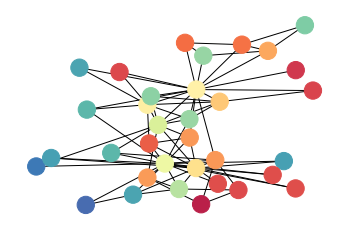

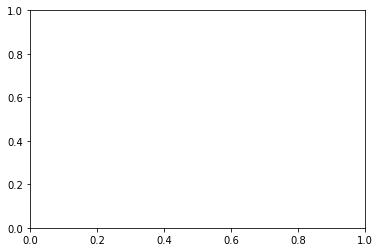

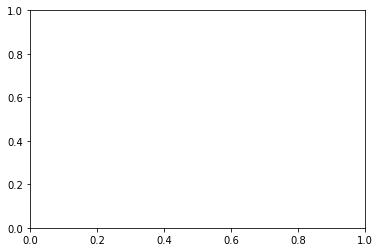

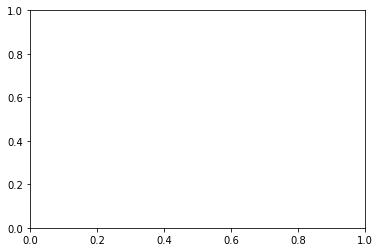

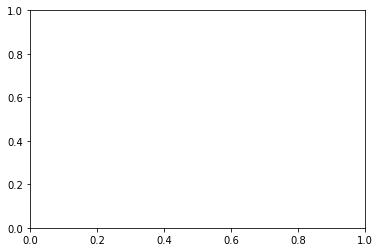

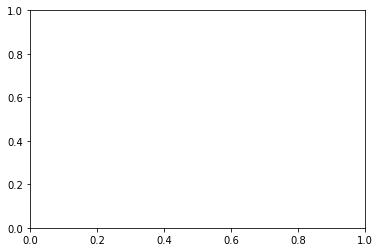

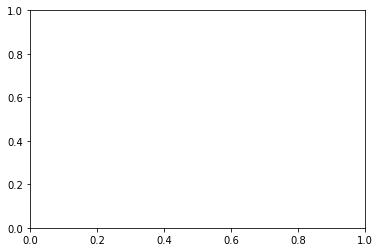

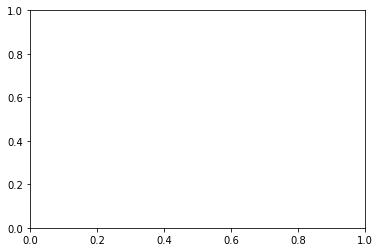

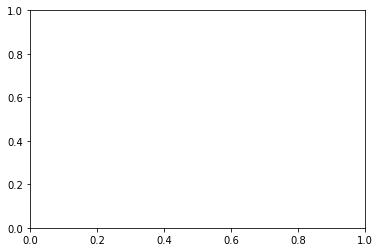

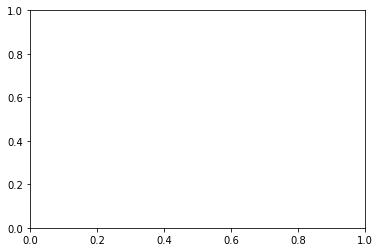

In [12]:
fig,ax=subplots()
observe()
for i in range(10):
    update()
    observe()
    show()

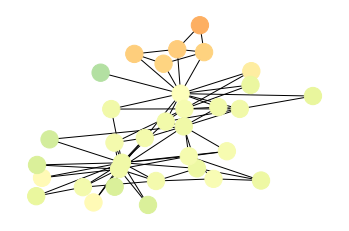

In [13]:
img=[]
initialize()
fig,ax=subplots()
for i in range(100):
    observe()
    savefig(f'./FIG/{i}.png')
    image=imageio.v2.imread(f'./FIG/{i}.png')
    img.append(image)
    update()

In [14]:
imageio.mimsave('./FIG/red.gif',img,duration=100,loop=1)

In [15]:
def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random.random() < .5 else 0
    
def observe():
    global g
    cla()
    nx.draw(g, cmap = cm.Wistia, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

p_i = 0.5 # infection probability
p_r = 0.1 # recovery probability

def update():
    global g
    a = random.choice(list(g.nodes))
    if g.nodes[a]['state'] == 0: # if susceptible
        b = random.choice(list(g.neighbors(a)))
        if g.nodes[b]['state'] == 1: # if neighbor b is infected
            g.nodes[a]['state'] = 1 if random.random() < p_i else 0
    else: # if infected
        g.nodes[a]['state'] = 0 if random.random() < p_r else 1

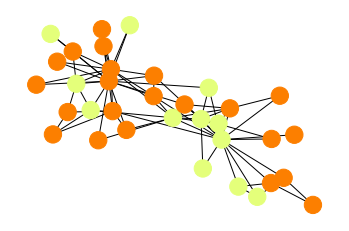

In [16]:
img=[]
initialize()
fig,ax=subplots()
for i in range(100):
    observe()
    savefig(f'./FIG2/{i}.png')
    image=imageio.v2.imread(f'./FIG2/{i}.png')
    img.append(image)
    update()

In [17]:
imageio.mimsave('./FIG2/red.gif',img,duration=100,loop=1)

In [18]:
populationSize = 500
linkProbability = 0.01
initialInfectedRatio = 0.01
infectionProb = 0.2
recoveryProb = 0.5

susceptible = 0
infected = 1

def initialize():
    global time, network, positions, nextNetwork

    time = 0
    
    network = nx.erdos_renyi_graph(populationSize, linkProbability)

    positions = nx.random_layout(network)

    for i in network.nodes:
        if random.random() < initialInfectedRatio:
            network.nodes[i]['state'] = infected
        else:
            network.nodes[i]['state'] = susceptible

    nextNetwork = network.copy()

def observe():
    cla()
    nx.draw(network,ax=ax,
            pos = positions,
            node_color = [network.nodes[i]['state'] for i in network.nodes],
            cmap = cm.Wistia,
            vmin = 0,
            vmax = 1)
    axis('image')
    title('t = ' + str(time))

def update():
    global time, network, nextNetwork

    time += 1

    for i in network.nodes:
        if network.nodes[i]['state'] == susceptible:
            nextNetwork.nodes[i]['state'] = susceptible
            for j in network.neighbors(i):
                if network.nodes[j]['state'] == infected:
                    if random.random() < infectionProb:
                        nextNetwork.nodes[i]['state'] = infected
                        break
        else:
            if random.random() < recoveryProb:
                nextNetwork.nodes[i]['state'] = susceptible
            else:
                nextNetwork.nodes[i]['state'] = infected

    network, nextNetwork = nextNetwork, network


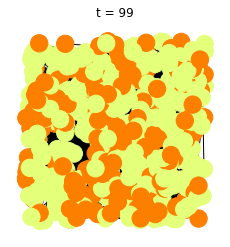

In [19]:
img=[]
initialize()
fig,ax=subplots()
for i in range(100):
    observe()
    savefig(f'./FIG3/{i}.png')
    image=imageio.v2.imread(f'./FIG3/{i}.png')
    img.append(image)
    update()

In [20]:
imageio.mimsave('./FIG3/red.gif',img,duration=100,loop=5)

In [21]:
populationSize = 500
linkProbability = 0.01
initialInfectedRatio = 0.01
infectionProb = 0.2
recoveryProb = 0.5
linkCuttingProb = 0.1

susceptible = 0
infected = 1

def initialize():
    global time, network, positions, nextNetwork

    time = 0
    
    network = nx.erdos_renyi_graph(populationSize, linkProbability)

    positions = nx.random_layout(network)

    for i in network.nodes:
        if random.random() < initialInfectedRatio:
            network.nodes[i]['state'] = infected
        else:
            network.nodes[i]['state'] = susceptible

    nextNetwork = network.copy()

def observe():
    cla()
    nx.draw(network, ax=ax,
            pos = positions,
            node_color = [network.nodes[i]['state'] for i in network.nodes],
            cmap = cm.Wistia,
            vmin = 0,
            vmax = 1)
    axis('image')
    title('t = ' + str(time))

def update():
    global time, network, nextNetwork

    time += 1

    for i in network.nodes:
        if network.nodes[i]['state'] == susceptible:
            nextNetwork.nodes[i]['state'] = susceptible
            for j in network.neighbors(i):
                if network.nodes[j]['state'] == infected:
                    if random.random() < infectionProb:
                        nextNetwork.nodes[i]['state'] = infected
                        break
                    else: # adaptive link cutting behavior
                        if random.random() < linkCuttingProb:
                            if nextNetwork.has_edge(i, j):
                                nextNetwork.remove_edge(i, j)
        else:
            if random.random() < recoveryProb:
                nextNetwork.nodes[i]['state'] = susceptible
            else:
                nextNetwork.nodes[i]['state'] = infected

    del network
    network = nextNetwork.copy()


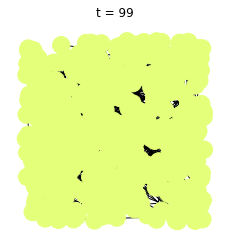

In [22]:
img=[]
initialize()
fig,ax=subplots()
for i in range(100):
    observe()
    savefig(f'./FIG4/{i}.png')
    image=imageio.v2.imread(f'./FIG4/{i}.png')
    img.append(image)
    update()

In [25]:
imageio.mimsave('./FIG4/red.gif',img,duration=100,loop=100)